In [2]:
import pandas as pd
import numpy as np
import json
import os
import re


In [4]:
pd.set_option('display.max_colwidth', 200)

In [12]:
PATH = 'cosmetic_p.csv'
df = pd.read_csv(PATH, low_memory=False)
df.head(3)

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus ...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butylene Glycol, Pentylene Glycol, Water, Sodium Benzoate, Methylparaben, Sorbic Acid.",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Cetearyl Alcohol, Cetearyl Olivate, Sorbitan Olivate, Sclerocarya Birrea Seed Oil, Bacillus/Soybean/ Folic Acid Ferment Extract, Nymphaea Alba Root Extract, ...",1,1,1,1,0


In [7]:
df['brand'].value_counts()

brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
SON & PARK             1
MAKEUP ERASER          1
KAT VON D              1
NURSE JAMIE            1
DERMAFLASH             1
Name: count, Length: 116, dtype: int64

In [36]:
names_with_z=df[df['rank'] == 0]['brand']
list_names = names_with_z.tolist()
list_names

['LA MER',
 'SK-II',
 'CLINIQUE',
 'ESTÉE LAUDER',
 'FRESH',
 'MURAD',
 'KATE SOMERVILLE',
 'PHILOSOPHY',
 'PETER THOMAS ROTH',
 'GLAMGLOW',
 'FOREO',
 'ALGENIST',
 'EVE LOM',
 'DRUNK ELEPHANT',
 'BEAUTYBIO',
 'SHISEIDO',
 'SEPHORA COLLECTION',
 'MOROCCANOIL',
 'DERMAFLASH']

In [9]:
df['brand'].nunique()

116

In [11]:
# print out column names
df.columns.tolist()

['Label',
 'brand',
 'name',
 'price',
 'rank',
 'ingredients',
 'Combination',
 'Dry',
 'Normal',
 'Oily',
 'Sensitive']

In [18]:
print(df.dtypes)

Label           object
brand           object
name            object
price            int64
rank           float64
ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object


In [14]:
df.isna().sum().sort_values(ascending=False)

Label          0
brand          0
name           0
price          0
rank           0
ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [28]:
labels = df['Label'].unique()
num_labels = df['Label'].nunique()
print(labels)
print(num_labels)

['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']
6


# EDA Notes
----
**1. Column Names (11)**
- Label **(obj)** 
- brand **(obj)**  
- name(of product) **(obj)** 
- price **(int)**
- rank (rating 0 to 5) **(float)**
- ingredients **(obj)** 

 *(rest are types of skin):*

- combination **(int)**
- dry **(int)**
- normal **(int)**
- oily **(int)**
- sensitive **(int)**

**2. Number of Brands**
* 116 different Brands

**3. NA's in Dataset**
* **NO NA's** 
----
## Consider 0 & 1 Scale for Types of :
## **Whether or not the product is recommended for type fo skin**
## **0**: **Not** recommended
## **1**: **recommended**
----

**4. Types of Skin: Outcome (0 or 1)**

* **combination**
* **dry**
* **normal**
* **oily**
* **sensitive**

**5. Label: (Type of Product)---- (6)**
* Moisturizer
* Cleanser
* Treatment
* Face Mask
* Eye Cream
* Sun Protect





In [ ]:
# isolate skin columns 
skin_cols = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']


In [ ]:
# separate into diff skin columns and get products for each skin and their ranks


# get products for each skin type

def products_for_skin(skin_cols, top=None, rank_ascending=False):
    output_cols = df[df[skin_cols] == 1][['brand', 'name', 'rank']].copy()


In [37]:
products_by_skin = (df.melt(
    id_vars = ['Label', 'brand', 'name', 'price', 'rank'],
    value_vars = skin_cols,
    var_name = 'skin_type',
    value_name = 'flag'

)
    .query('flag == 1')
    .assign(skin_type = lambda x: x['skin_type'].str.lower())
    .sort_values(['skin_type', 'rank'], ascending = [True, True])
    .reset_index(drop=True)
)
products_by_skin = products_by_skin.query("rank > 0")

products_by_skin.to_csv('products_by_skin_type.csv', index=False)

In [45]:
df2 = pd.read_csv('products_by_skin_type.csv')
df2['skin_type'].value_counts()
df2['rank'].max()

5.0

products_by_skin['skin_type'].value_counts()

In [38]:
products_by_skin['skin_type'].value_counts()

skin_type
combination    957
normal         952
dry            895
oily           886
sensitive      750
Name: count, dtype: int64

In [22]:
products_by_skin['rank'].describe()

count    4480.000000
mean        4.168594
std         0.580111
min         0.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rank, dtype: float64

In [23]:
products_by_skin['price'].describe()

count    4480.000000
mean       56.575893
std        45.803852
min         3.000000
25%        30.000000
50%        44.000000
75%        68.000000
max       345.000000
Name: price, dtype: float64

In [24]:
(products_by_skin.groupby(['skin_type', 'brand']).size().sort_values(ascending=False).groupby(level=0).head(5))

skin_type    brand             
combination  DR. JART+             38
sensitive    DR. JART+             38
normal       DR. JART+             38
dry          DR. JART+             37
combination  KIEHL'S SINCE 1851    37
normal       KIEHL'S SINCE 1851    37
oily         KIEHL'S SINCE 1851    37
normal       ORIGINS               36
dry          KIEHL'S SINCE 1851    35
oily         ORIGINS               34
combination  CLINIQUE              33
             ORIGINS               33
oily         DR. JART+             33
sensitive    KIEHL'S SINCE 1851    33
normal       SHISEIDO              31
dry          ORIGINS               31
             SHISEIDO              31
normal       PETER THOMAS ROTH     30
combination  PETER THOMAS ROTH     30
oily         PETER THOMAS ROTH     30
             CLINIQUE              30
sensitive    CAUDALIE              30
dry          PETER THOMAS ROTH     28
sensitive    FIRST AID BEAUTY      28
             PETER THOMAS ROTH     24
dtype: int64

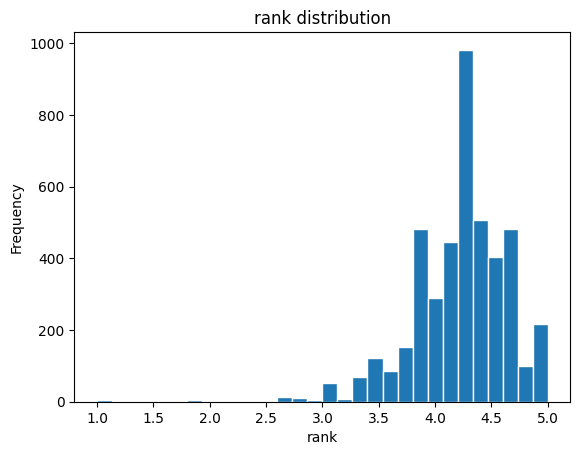

In [46]:
import matplotlib.pyplot as plt
df2['rank'].plot(kind='hist', bins=30,edgecolor='white')
plt.title('rank distribution')
plt.xlabel('rank')
plt.show()

In [47]:
df2 = pd.read_csv('products_by_skin_type.csv')
df2.head(5)

,Label,brand,name,price,rank,skin_type,flag
0,Face Mask,FOREO,Shimmer Freak Mask,19,1.0,combination,1
1,Eye cream,BOSCIA,Sake Brightening Bio-Cellulose Eye Masks,15,1.8,combination,1
2,Face Mask,SEPHORA COLLECTION,SUPERMASK - The Golden Mask,6,2.6,combination,1
3,Face Mask,EVE LOM,WHITE Brightening Mask,160,2.7,combination,1
4,Face Mask,SKIN LAUNDRY,Wrinkle Release Neck & Chest Sheet Mask,60,2.7,combination,1


In [39]:
df2['rank'].unique()

array([0. , 1. , 1.8, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])